In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split



In [3]:
df = pd.read_csv('csv-files/height-weight.csv')
df.head(6)


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162


Text(0, 0.5, 'Height')

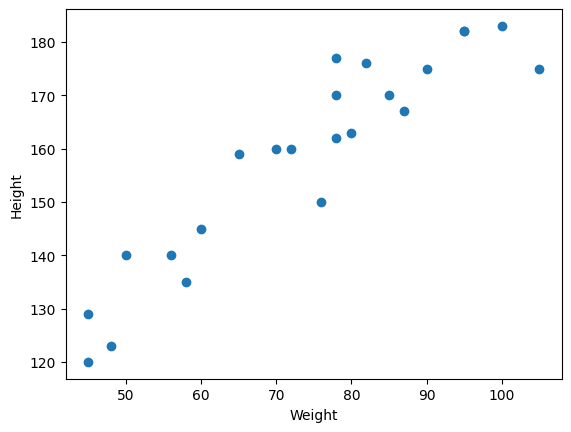

In [10]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [8]:
#Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [54]:
#Split Data
X = df[["Weight"]]
Y = df["Height"]


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [55]:
#Standardization -> prevents data leakage (No train data can know anything about test data)
#Z-score with mean = 0, std = 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test


array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [56]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs = -1)
regression.fit(X_train,y_train)

print("Coefficient: " ,regression.coef_)
print("Intercept: ", regression.intercept_)



Coefficient:  [17.2982057]
Intercept:  156.47058823529412


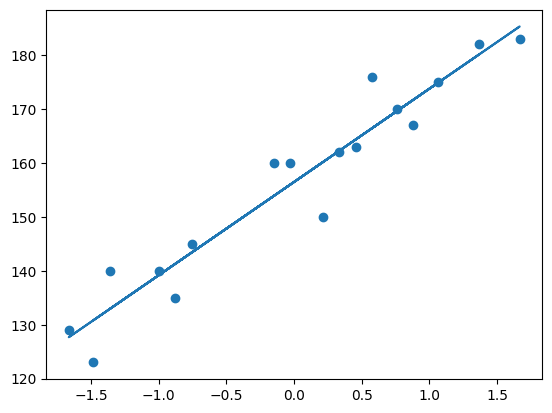

In [57]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train))


In [63]:
y_pred = regression.predict(X_test)
print(y_test,y_pred)

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64 [162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [59]:
#Performance metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

#adjusted r score
Adjusted = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


print("Adjusted R2: ", Adjusted)

0.7360826717981276


0.6701033397476595

In [66]:
#OLS Linear Regression

import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()
pred = model.predict(X_test)

print(pred)

print(model.summary())

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]
                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 08 Jul 2025   Prob (F-statistic):                       0.664
Time:                        14:00:12   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

/Users/jacoblerner/Desktop/UChicago/MLTraining/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


array([1401.94139895])